In [125]:
import pandas as pd
import numpy as np

In [126]:

labels = pd.read_fwf("./UCI_HAR_Dataset/features.txt",header=None)
X_train = pd.read_fwf("./UCI_HAR_Dataset/train/X_train.txt",header=None)
X_train.columns = labels


y_train = pd.read_fwf("./UCI_HAR_Dataset/train/y_train.txt",header=None)
y_train = pd.Series(y_train[0])

X_test = pd.read_fwf("./UCI_HAR_Dataset/test/X_test.txt",header=None)
X_test.columns = labels

y_test = pd.read_fwf("./UCI_HAR_Dataset/test/y_test.txt",header=None)
y_test = pd.Series(y_test[0])

data = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])


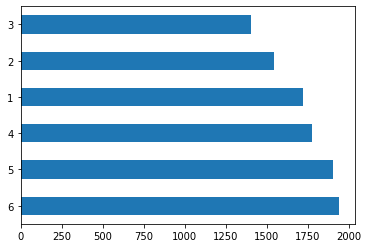

In [127]:
y.value_counts().plot(kind='barh')

In [128]:
data.isna().sum().sum()

0

In [129]:
a = pd.Series([i[0] for i in data.columns]).str.contains('Gyro')
data_gyro = data[data.columns[a]]

In [130]:
b = pd.Series([i[0] for i in data.columns]).str.contains('Acc')
data_acc = data[data.columns[b]]

In [131]:
data_gyro.columns.intersection(data_acc.columns) #Wiec jest gitara

Index([], dtype='object')

In [132]:
angle = data.columns.difference(data_gyro.columns.union(data_acc.columns))
data_angle = data[angle]

In [133]:
data.describe()

,"(1 tBodyAcc-mean()-X,)","(2 tBodyAcc-mean()-Y,)","(3 tBodyAcc-mean()-Z,)","(4 tBodyAcc-std()-X,)","(5 tBodyAcc-std()-Y,)","(6 tBodyAcc-std()-Z,)","(7 tBodyAcc-mad()-X,)","(8 tBodyAcc-mad()-Y,)","(9 tBodyAcc-mad()-Z,)","(10 tBodyAcc-max()-X,)",...,"(552 fBodyBodyGyroJerkMag-meanFre,)","(553 fBodyBodyGyroJerkMag-skewnes,)","(554 fBodyBodyGyroJerkMag-kurtosi,)","(555 angle(tBodyAccMean,gravity),)","(556 angle(tBodyAccJerkMean),grav,)","(557 angle(tBodyGyroMean,gravityM,)","(558 angle(tBodyGyroJerkMean,grav,)","(559 angle(X,gravityMean),)","(560 angle(Y,gravityMean),)","(561 angle(Z,gravityMean),)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274881,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.065426,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262711,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277181,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288412,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data set is scaled to \[-1, 1\]. Without missing values.

# Gyrometer

Signal from gyrometer is diveded to 2.5 seconds intervals (frames). Each frame is represented with set of statistics (mean, std, energy, entropy etc.). Next jerk of signal was calculated (GyroJerk). After that magnitude of both signal and its jerk was calculated (GyroMag, GyroJerkMag). Finally all obtained variables were transformed with Furier transform (prefix "f"). Hence, only for gyroscope signal we have over 200 variables. 

In [134]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [135]:
#coding labels to descriptive values
labels = {1: "walking", 2: "walking_upstairs", 
          3: "walking_downstairs", 4: "sitting", 
          5: "standing", 6: "laying"}
y.replace(labels, inplace=True)

In [136]:
data_gyro.head()

,"(121 tBodyGyro-mean()-X,)","(122 tBodyGyro-mean()-Y,)","(123 tBodyGyro-mean()-Z,)","(124 tBodyGyro-std()-X,)","(125 tBodyGyro-std()-Y,)","(126 tBodyGyro-std()-Z,)","(127 tBodyGyro-mad()-X,)","(128 tBodyGyro-mad()-Y,)","(129 tBodyGyro-mad()-Z,)","(130 tBodyGyro-max()-X,)",...,"(547 fBodyBodyGyroJerkMag-sma(),)","(548 fBodyBodyGyroJerkMag-energy(,)","(549 fBodyBodyGyroJerkMag-iqr(),)","(550 fBodyBodyGyroJerkMag-entropy,)","(551 fBodyBodyGyroJerkMag-maxInds,)","(552 fBodyBodyGyroJerkMag-meanFre,)","(553 fBodyBodyGyroJerkMag-skewnes,)","(554 fBodyBodyGyroJerkMag-kurtosi,)","(557 angle(tBodyGyroMean,gravityM,)","(558 angle(tBodyGyroJerkMean,grav,)"
0,-0.006101,-0.031365,0.107725,-0.985310,-0.976623,-0.992205,-0.984586,-0.976353,-0.992362,-0.867044,...,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.464761,-0.018446
1,-0.016112,-0.083894,0.100584,-0.983120,-0.989046,-0.989121,-0.986890,-0.989038,-0.989185,-0.864904,...,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,-0.732626,0.703511
2,-0.031698,-0.102335,0.096127,-0.976292,-0.993552,-0.986379,-0.974922,-0.994122,-0.985786,-0.864904,...,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,0.100699,0.808529
3,-0.043410,-0.091386,0.085538,-0.991385,-0.992407,-0.987554,-0.991589,-0.993142,-0.989585,-0.885320,...,-0.995221,-0.999974,-0.995226,-0.955696,-0.936508,0.404573,-0.117290,-0.482845,0.640011,-0.485366
4,-0.033960,-0.074708,0.077392,-0.985184,-0.992378,-0.987402,-0.986944,-0.992542,-0.988163,-0.870154,...,-0.995093,-0.999974,-0.995487,-1.000000,-0.936508,0.087753,-0.351471,-0.699205,0.693578,-0.615971


In [137]:
data_gyro.columns

Index([          ('121 tBodyGyro-mean()-X',),
                 ('122 tBodyGyro-mean()-Y',),
                 ('123 tBodyGyro-mean()-Z',),
                  ('124 tBodyGyro-std()-X',),
                  ('125 tBodyGyro-std()-Y',),
                  ('126 tBodyGyro-std()-Z',),
                  ('127 tBodyGyro-mad()-X',),
                  ('128 tBodyGyro-mad()-Y',),
                  ('129 tBodyGyro-mad()-Z',),
                  ('130 tBodyGyro-max()-X',),
       ...
         ('547 fBodyBodyGyroJerkMag-sma()',),
       ('548 fBodyBodyGyroJerkMag-energy(',),
         ('549 fBodyBodyGyroJerkMag-iqr()',),
       ('550 fBodyBodyGyroJerkMag-entropy',),
       ('551 fBodyBodyGyroJerkMag-maxInds',),
       ('552 fBodyBodyGyroJerkMag-meanFre',),
       ('553 fBodyBodyGyroJerkMag-skewnes',),
       ('554 fBodyBodyGyroJerkMag-kurtosi',),
       ('557 angle(tBodyGyroMean,gravityM',),
       ('558 angle(tBodyGyroJerkMean,grav',)],
      dtype='object', length=213)

In [138]:
#Renaming clumns to their number only for easier work
data_gyro = data_gyro.rename(columns = lambda x : str(x)[2:5])

In [139]:
data = data.rename(columns = lambda x : str(x)[2:5])

### BodyGyro-mean X-Y-Z

Raw signal analysis. As it is measured in 3-dimensional space, we visualize its statistics in 3D scatter plots. Signal is compared to its Furier transform.

In [140]:
#Color values for plots
colors = {'standing': 'yellow',
         'sitting': 'green',
         'laying': 'blue',
         'walking': 'orange',
         'walking_downstairs': 'brown',
         'walking_upstairs': 'red'}
col_vec = y.apply(lambda x: colors[x])

In [141]:
def scatter_3D(df, y, title):
    """Function for 3D scatter plot from 3-col dataframe and labels vector"""
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    z = df.iloc[:, 2]
    ax.scatter3D(x, y, z, c = col_vec)
    plt.title(title)
    ax.set_xlabel('X direction')
    ax.set_ylabel('Y direction')
    ax.set_zlabel('Z direction')

In [142]:
tBodyGyro_mean = data_gyro[['121','122','123']]

In [143]:
fBodyGyro_mean = data_gyro[['424', '425', '426']]

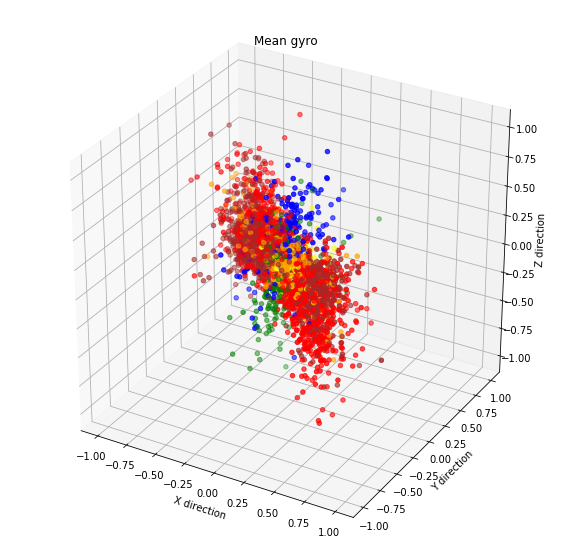

In [144]:
scatter_3D(tBodyGyro_mean, y, "Mean gyro")

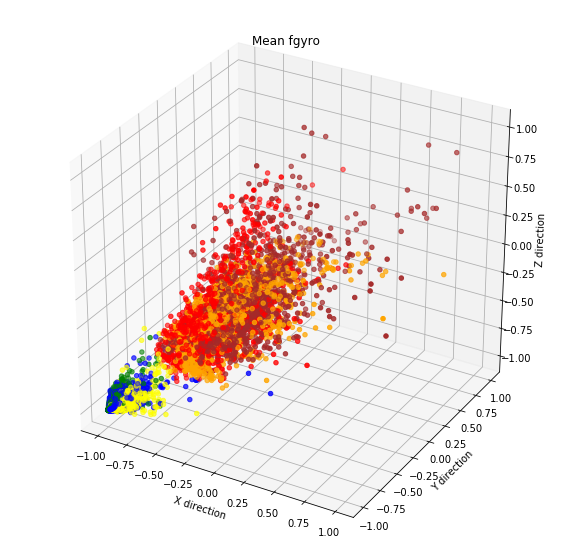

In [145]:
scatter_3D(fBodyGyro_mean, y, "Mean fgyro")

### BodyGyro-energy X-Y-Z

In [146]:
tBodyGyro_energy = data_gyro[['137', '138', '139']]

In [147]:
fBodyGyro_energy = data_gyro[['440', '441', '442']]

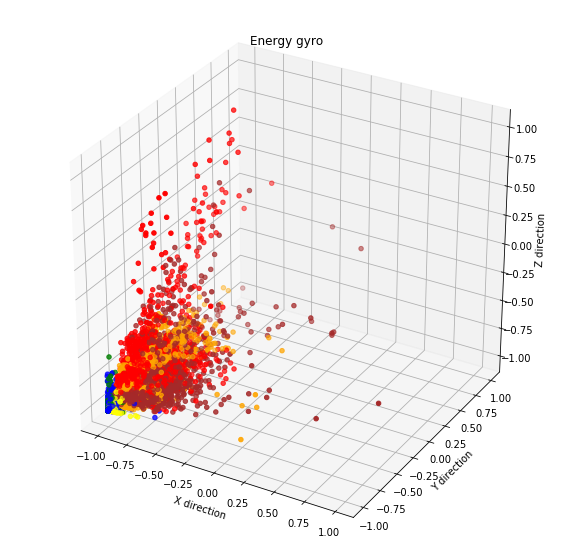

In [148]:
scatter_3D(tBodyGyro_energy, y, "Energy gyro")

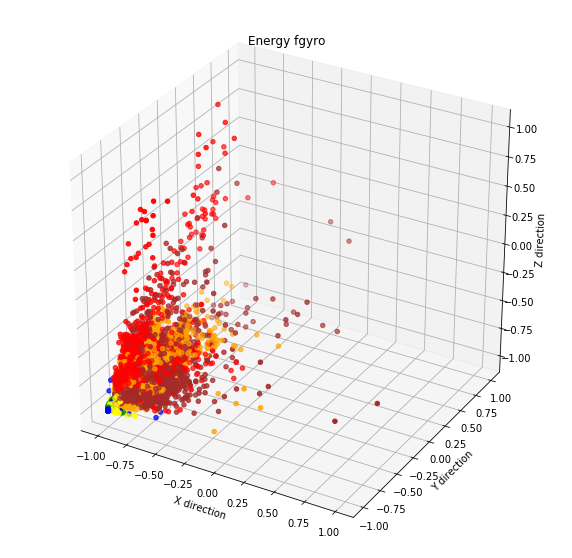

In [149]:
scatter_3D(fBodyGyro_energy, y, "Energy fgyro")

### BodyGyro-entropy X-Y-Z

In [150]:
tBodyGyro_entropy = data_gyro[['143','144','145']]

In [151]:
fBodyGyro_entropy = data_gyro[['446', '447', '448']]

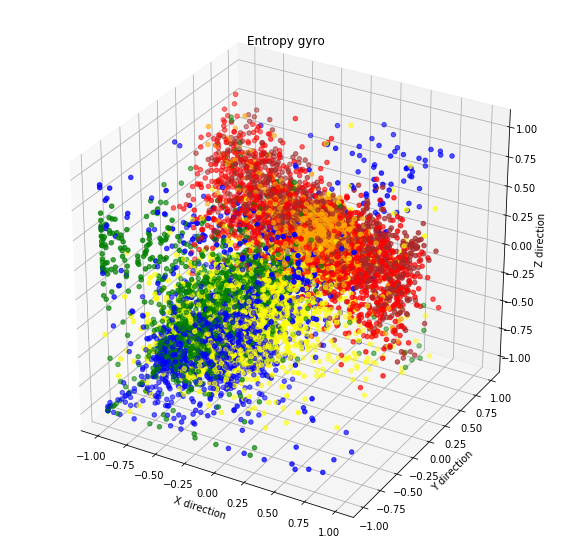

In [152]:
scatter_3D(tBodyGyro_entropy, y, "Entropy gyro")

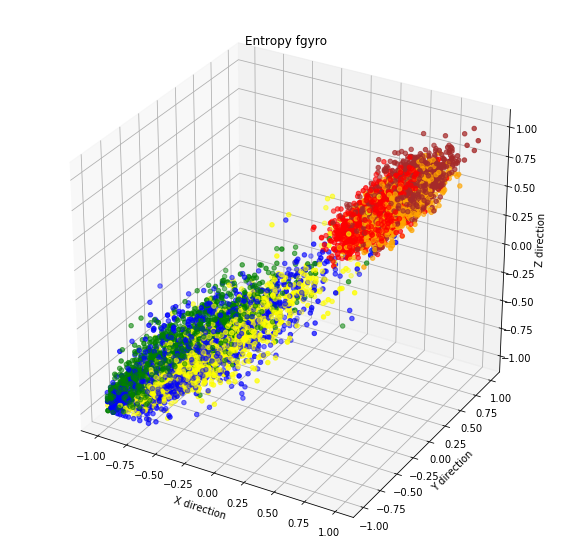

In [153]:
scatter_3D(fBodyGyro_entropy, y, "Entropy fgyro")

For raw signal Furier transform helps to obtain dataset with more separable groups of points which decribe different activities. Especially mean and entropy of Furier transformed signals shows interesting distribution of observations. Points have visible two groups: motion and no-motions activities.

### BodyGyroJerk-mean

Jerk ("zryw") is derivation of angular velocity measured by gyroscope. Furier transform is not applied, so we can observe only raw signal.

In [154]:
tBodyGyroJerk_mean = data_gyro[['161', '162', '163']]

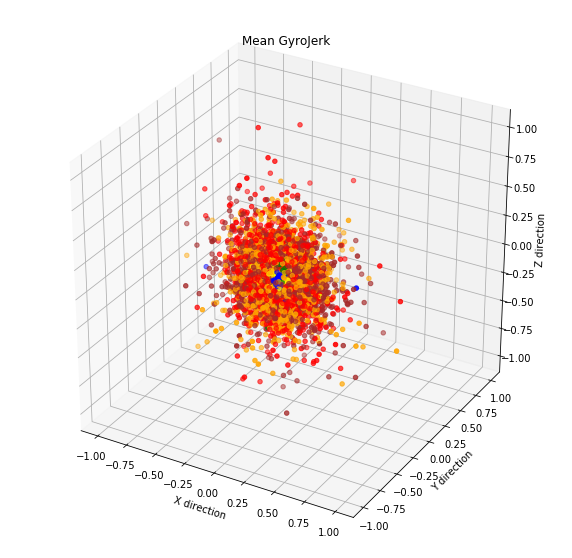

In [155]:
scatter_3D(tBodyGyroJerk_mean, y, "Mean GyroJerk")

### BodyGyroJerk-energy

In [156]:
tBodyGyroJerk_energy = data_gyro[['177', '178', '179']]

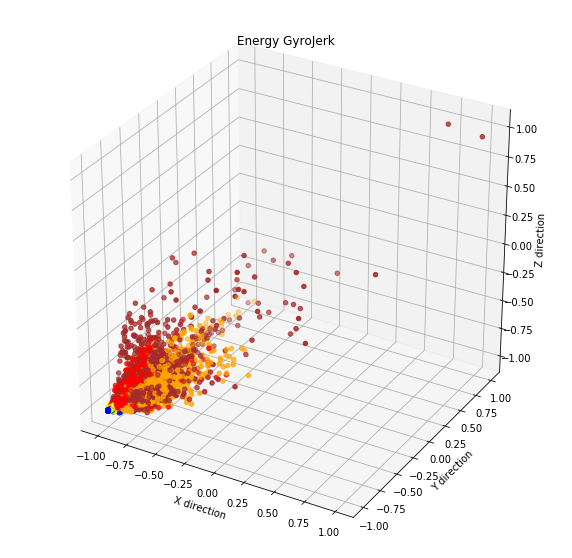

In [157]:
scatter_3D(tBodyGyroJerk_energy, y, "Energy GyroJerk")

### BodyGyroJerk-entropy

In [158]:
tBodyGyroJerk_entropy = data_gyro[['183', '184', '185']]

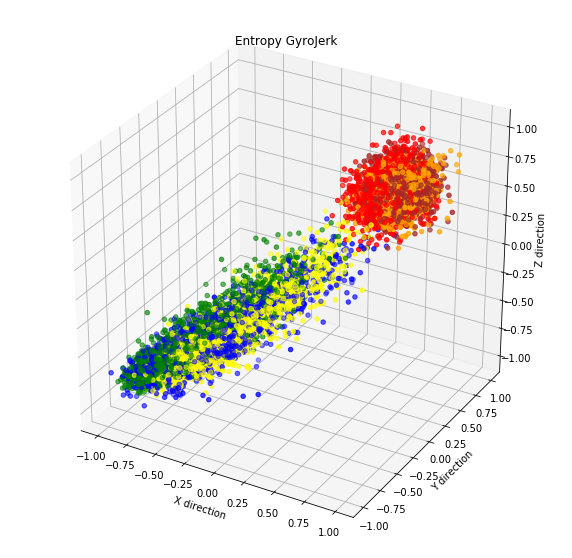

In [159]:
scatter_3D(tBodyGyroJerk_entropy, y, "Entropy GyroJerk")

Similar conlusions as for raw signal can be made. Entropy of jerk signal is the most useful. However, both jerk and raw signal do not provide enough differentiation among points to distinguish activities inside groups of motion and no-motion on plots.

## Gyrometer signls magnitude
Magnitude reduces signal to one-dimensional information so it can be visualized on boxplot to compare it among different activities. As it is also Furier transformed, two boxplots for each group are presented.

In [160]:
def box_gr(vt, vf, title):
    """Function for grouped boxplots to compare variable with its fourier transform,
    among activity labels"""
    
    t = pd.Series(data_gyro[vf])
    yes = pd.Series(np.repeat('yes', len(data_gyro)))
    t = pd.concat([t.reset_index(drop=True), yes, y.reset_index(drop=True)], axis=1)
    t.columns = ['v', 'furier', 'g']    
    
    f = pd.Series(data_gyro[vt])
    no = pd.Series(np.repeat('no', len(data_gyro)))
    f = pd.concat([f.reset_index(drop=True), no, y.reset_index(drop=True)], axis=1)
    f.columns = ['v', 'furier', 'g']
    
    df = t.append(f)
    
    fig=plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x='g', y='v', hue='furier')
    plt.title(title)
    plt.xlabel("activity")
    plt.ylabel('value')

### BodyGyroMag-mean
First plots present magnitude analyize for raw signal.

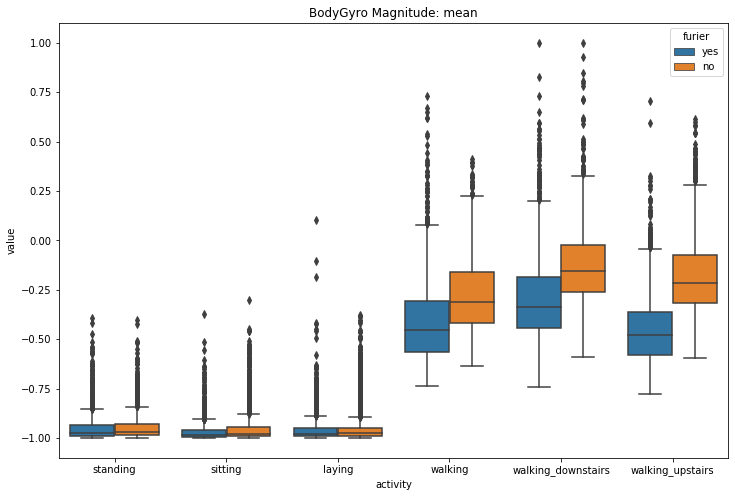

In [161]:
box_gr('240', '529', "BodyGyro Magnitude: mean")

### BodyGyroMag-energy

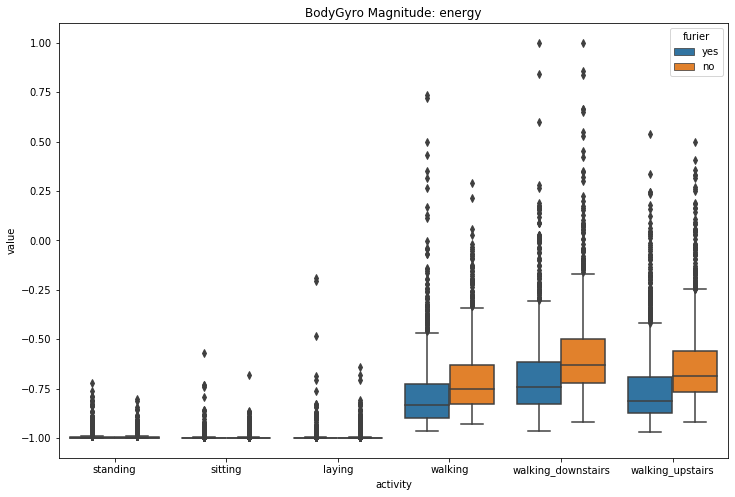

In [162]:
box_gr('246', '535', "BodyGyro Magnitude: energy")

### BodyGyroMag-entropy

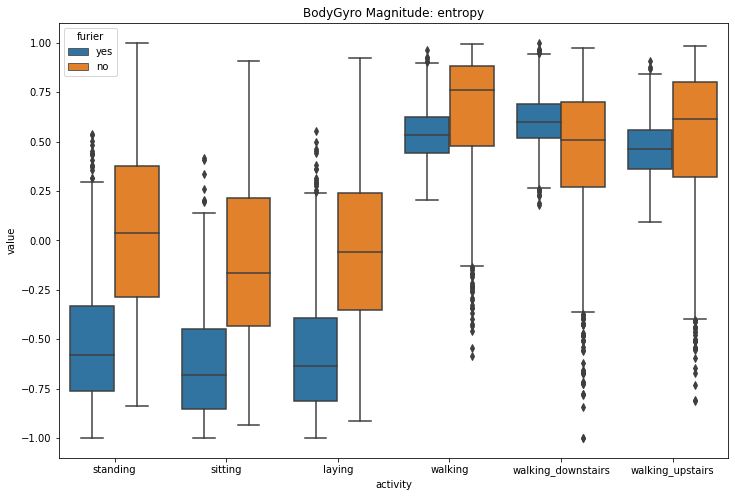

In [163]:
box_gr('248', '537', "BodyGyro Magnitude: entropy")

Definietly two groups are again observed. Motion and no-motion activities. However, it is impossible to distinguish activities in their groups.

### BodyGyroJerkMag - mean

Now magnitude of jerk signal is visualized.

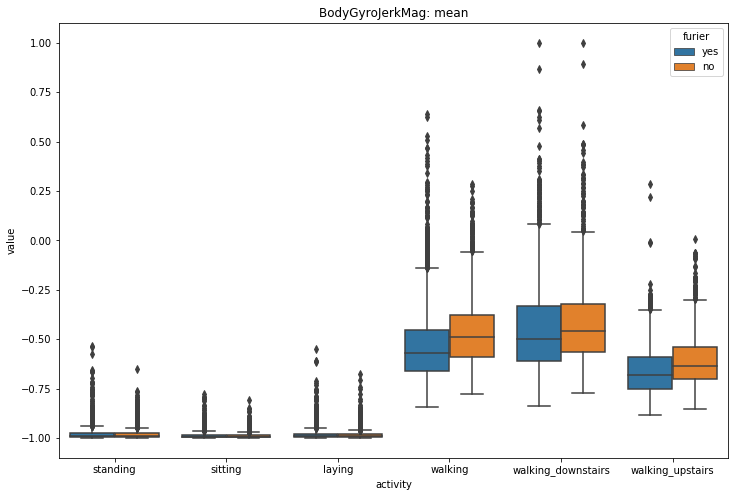

In [164]:
box_gr('253', '542', 'BodyGyroJerkMag: mean')

### BodyGyroJerkMag - energy

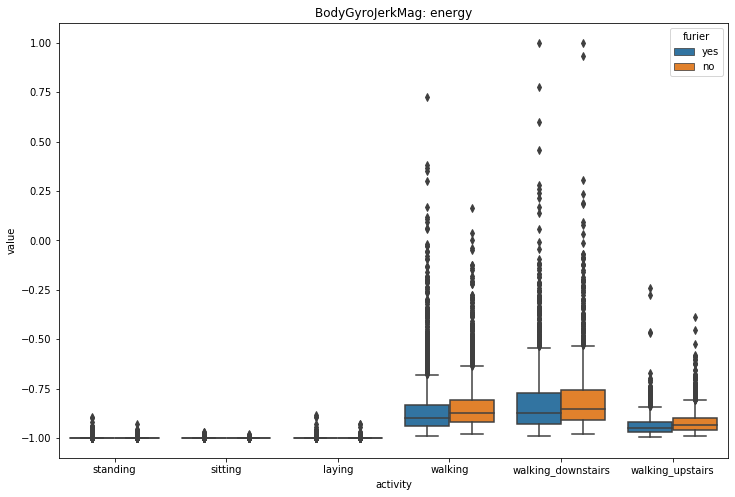

In [165]:
box_gr('259', '548', 'BodyGyroJerkMag: energy')

### BodyGyroJerkMag - entropy

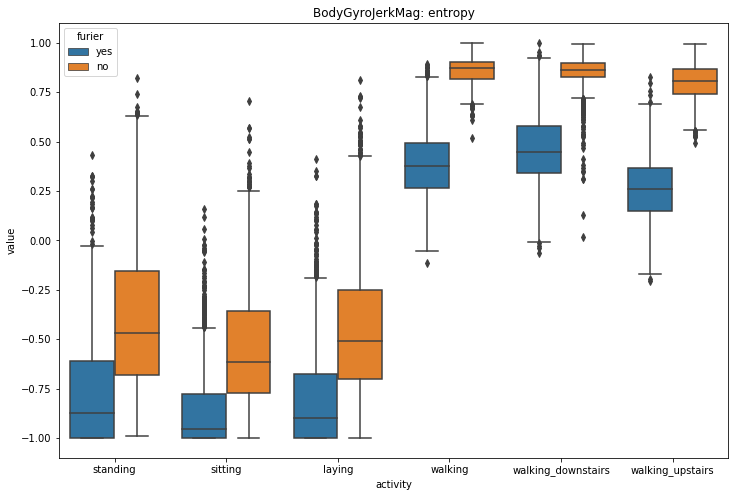

In [166]:
box_gr('261', '550', 'BodyGyroJerkMag: entropy')

Conclusions are similar to raw signal. Additional Furier transform seems to make distributions more concentrated.

## Correlations inside signal
As signal is represented in 3D, correlations between its statistics among dimension was computed. Plot below represents correlations of signal values among pairs of dimensions for each observation.

In [167]:
def scatter_3D_corr(df, y, title):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    z = df.iloc[:, 2]
    ax.scatter3D(x, y, z, c = col_vec)
    plt.title(title)
    ax.set_xlabel('X-Y corr')
    ax.set_ylabel('X-Z corr')
    ax.set_zlabel('Y-Z corr')

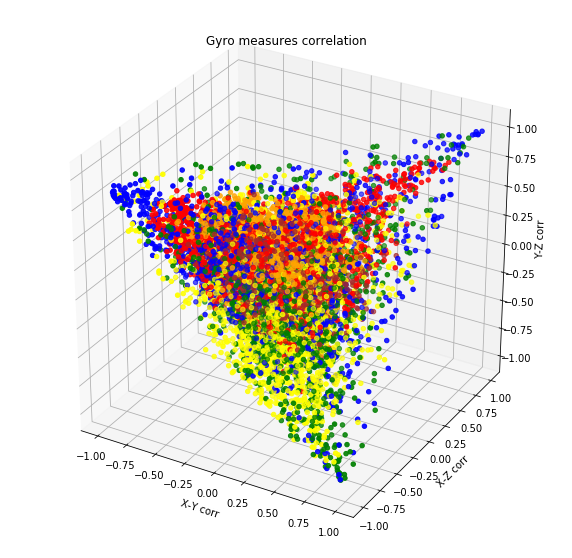

In [168]:

tBodyGyro_corr = data_gyro[['158', '159', '160']]
scatter_3D_corr(tBodyGyro_corr, y, "Gyro measures correlation")

We cannot make useful observations, but plot looks interesting anyway.

### Acc - Gyro signals magnitude relations
It seems difficult to find relations between gyroscope and accelerometer signals, because of its 3D-multistatistical characteristic. As reasonable approach we tried to find dependencies among signals magnitudes, as it is reduced to one-dimensional value. Plots below visualise ditributions of signal magnitude statistics on pairplots of accelerometer and gyroscope values.

In [169]:
def pair_scat(vacc, vgyro, title):
    sns.scatterplot(data = pd.concat([data[vacc], data_gyro[vgyro], y], axis=1),
               x = vacc, y = vgyro, hue = 0, legend = False)
    plt.xlabel("BodyGyro")
    plt.ylabel("BodyAcc")
    plt.title(title)

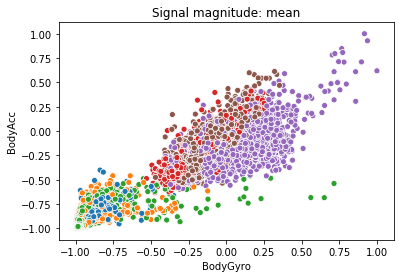

In [170]:
pair_scat('201', '240', "Signal magnitude: mean")

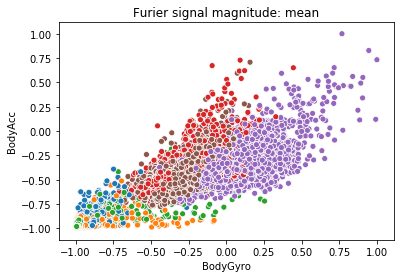

In [171]:
pair_scat('503', '529', "Furier signal magnitude: mean")

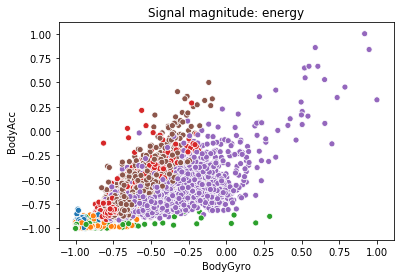

In [172]:
pair_scat('207', '246', "Signal magnitude: energy")

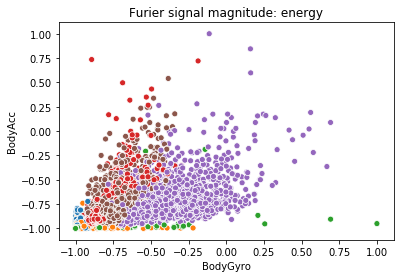

In [173]:
pair_scat('509', '535', "Furier signal magnitude: energy")

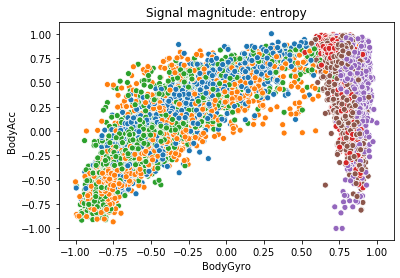

In [174]:
pair_scat('209', '248', "Signal magnitude: entropy")

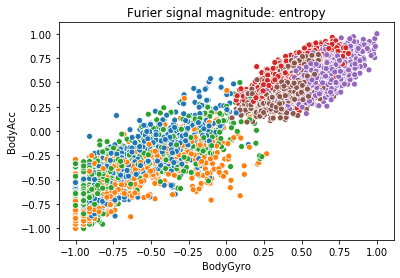

In [175]:
pair_scat('511', '537', "Furier signal magnitude: entropy")

Mean and entropy of signals from accelerometer and gyroscope seems to have visible correlation. This observation is compatible with our intuition, that measures from these two sensors should be somehow dependent.

### Correlations

In our dataset we have 561 variables, all numerical. Usual corrlation analysis is impossible. Correlation matrix presented below can only tell us, that in dataset are definietly many variables highly correlated.

In [176]:
corr_matrix = data.corr().abs()
corr = corr_matrix.unstack()
corr.sort_values(ascending = False, inplace=True)

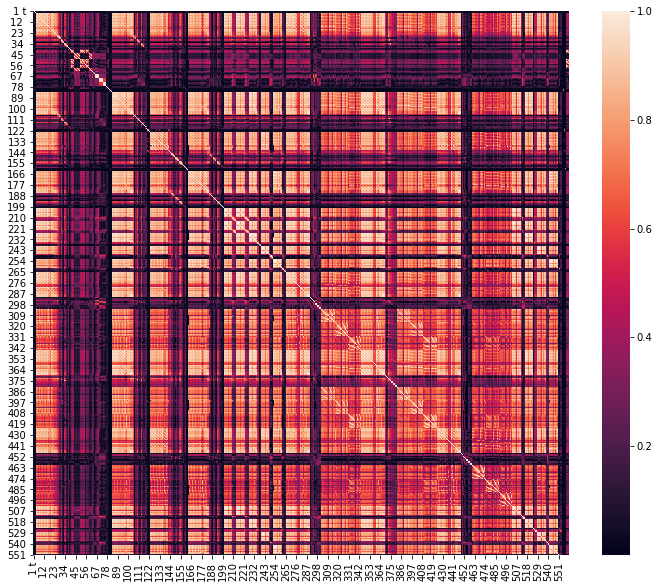

In [177]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix)

In [178]:
corr = pd.DataFrame(corr)
corr.reset_index(inplace=True)

In [179]:
#(561 over 2) correlations values for pairs of variables
corr_uni = corr[corr['level_0']!=corr['level_1']]
corr_uni = corr_uni.iloc[::2, :]
#Correlation values higher than 0.9
corr_uni_09 = corr_uni[corr_uni[0]>0.9]

Histogram below represents distribution of correlations values for all pairs of variables from our dataset. We have a lot of correlation values higher than 0.8. Additional information provide boxplot of this values.

Text(0.5, 0, 'value')

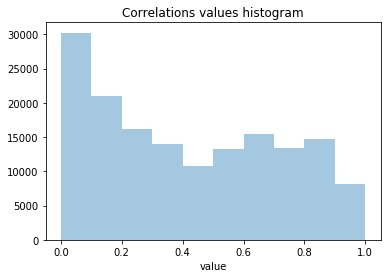

In [180]:
sns.distplot(corr_uni[0], kde=False, bins = 10)
plt.title("Correlations values histogram")
plt.xlabel("value")

Text(0.5, 0, 'value')

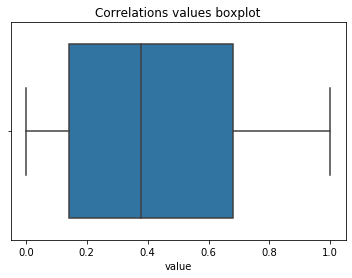

In [181]:
sns.boxplot(corr_uni[0])
plt.title("Correlations values boxplot")
plt.xlabel("value")

In [182]:
print(f"Number of pairs of variables with correlation higher than 0.9: {len(corr_uni_09)}")
print(f"Which is {len(corr_uni_09)*100/len(corr_uni):.1f}% of all pairs.")

Number of pairs of variables with correlation higher than 0.9: 8129
Which is 5.2% of all pairs.
